In [2]:
import os
#os.environ["CUDA_VISIBLE_DEVICES"] = "-1" # do not use GPU
%env SM_FRAMEWORK=tf.keras
from bfseg.data.meshdist.dataLoader import DataLoader
from bfseg.utils.losses import ignorant_cross_entropy_loss
from bfseg.utils.metrics import IgnorantAccuracyMetric, IgnorantBalancedAccuracyMetric
from bfseg.utils.evaluation import scoreAndPlotPredictions
import segmentation_models as sm
import tensorflow as tf
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [60, 40]
workingdir = "/home/rene/cla_dataset/sp_slac/"
validationDir ='/home/rene/hiveLabels/'
# Desired image shape. Input images will be cropped + scaled to this shape
image_w = 720
image_h = 480
dataLoaderArche = DataLoader(workingdir, [image_h, image_w],  validationDir = validationDir, validationMode="ARCHE", batchSize=5)
dataLoaderCLA = DataLoader(workingdir, [image_h, image_w],  validationDir = validationDir, validationMode="CLA", batchSize=5)

env: SM_FRAMEWORK=tf.keras
Segmentation Models: using `tf.keras` framework.


In [5]:
## Pretrained NYU model for 10 epochs

model_weights = '../src/resnet_34_sp.h5'
model = sm.PSPNet("resnet34", input_shape=(image_h, image_w, 3), classes=2)

model.compile(
    loss=ignorant_cross_entropy_loss,
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy']
)

model.load_weights(model_weights)

In [7]:

train_ds, test_ds = dataLoaderCLA.getDataset()
for img, label in train_ds.take(1):
    break

In [14]:
import numpy as np

In [8]:
for img, label in train_ds.take(1):
    break

In [ ]:
pseudo_labels = tf.argmax(pred, axis = -1)*2
threshold = 0.9
pseudo_label_uncertain = tf.greater_equal(tf.reduce_max(pred, axis = -1) , threshold)
indexes = tf.where(pseudo_label_uncertain, pseudo_labels, tf.ones_like(pseudo_labels))

In [69]:
prediction = model.predict(img)
threshold = 0.9
believe = tf.greater_equal(tf.reduce_max(pred, axis = -1) , threshold)
assignement = tf.argmax(pred, axis = -1)*2
pseudo_labels = tf.where(believe, assignement, tf.ones_like(assignement))

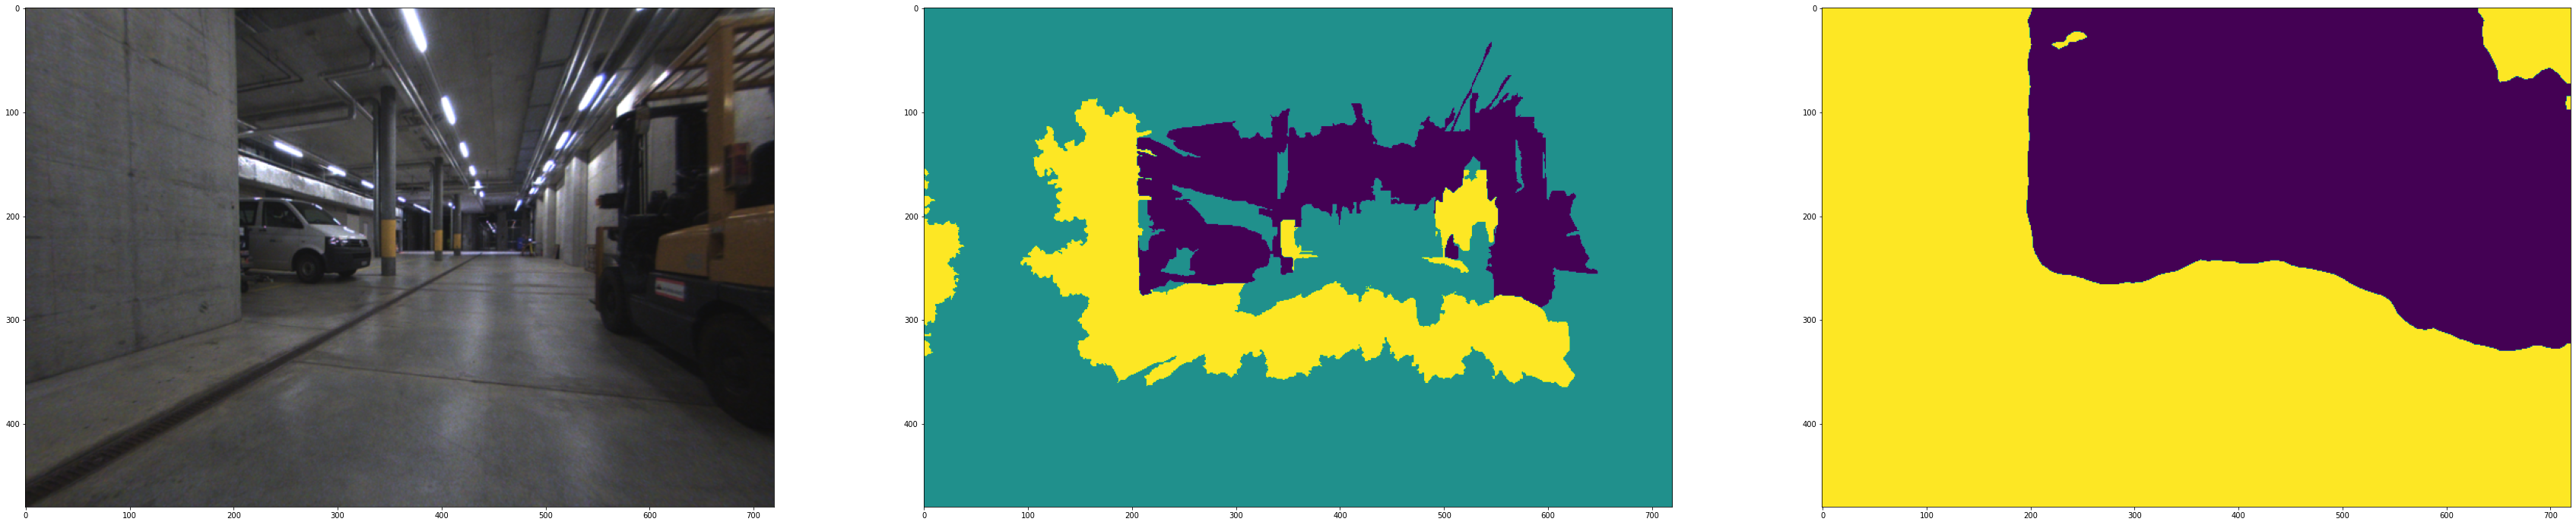

In [17]:
plt.subplot(1,3,1)
plt.imshow(img[0])
plt.subplot(1,3,2)
plt.imshow(label[0])
plt.subplot(1,3,3)
plt.imshow(np.argmax(pred[0], axis = -1))

In [42]:
mask = tf.greater_equal(a, 2)  # [False False  True  True False  True  True False]
indexes = tf.where(mask)  # [[2] [3] [5] [6]], shape=(4, 1)
b = tf.scatter_update(a, mask, tf.constant(1500))

In [49]:
.shape

TensorShape([5, 480, 720])

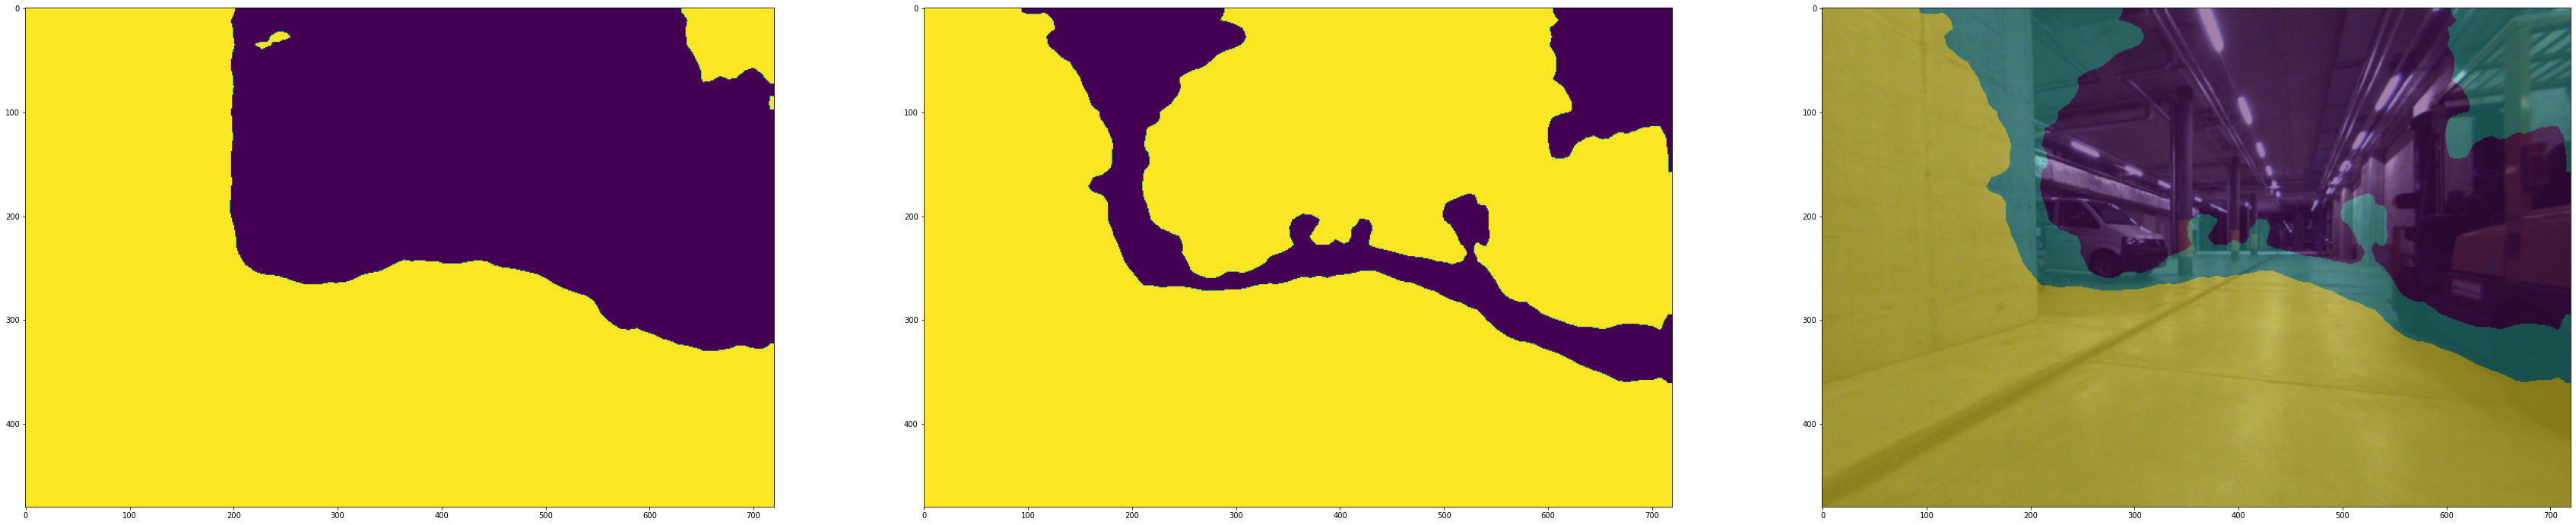

In [68]:
plt.subplot(1,3,1)
plt.imshow(pseudo_labels[0])
plt.subplot(1,3,2)
plt.imshow(pseudo_label_uncertain[0])
plt.subplot(1,3,3)
# plt.imshow(np.argmax(pred[0], axis = -1))
plt.imshow(img[0])
plt.imshow(indexes[0], alpha = 0.5)